In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [56]:
df = pd.read_csv('final_data.csv')

In [59]:
# Gereksiz kolonları sildim
df= df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

# Temizlenmiş veri seti
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


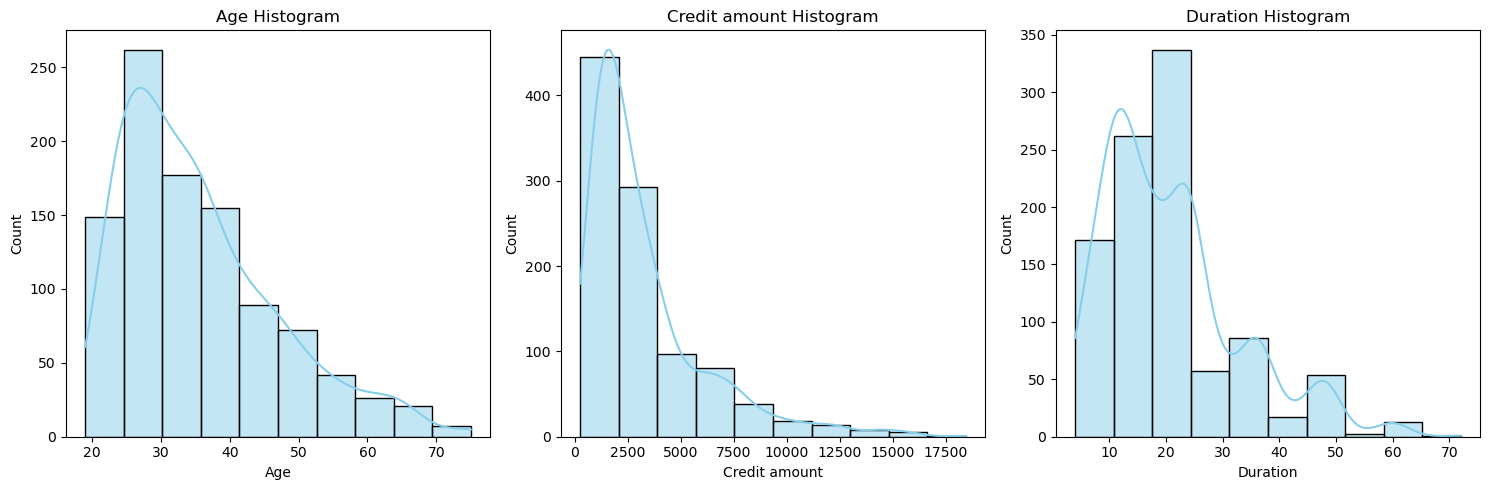

In [13]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=10, color='skyblue')
    plt.title(f'{column} Histogram')
plt.tight_layout()
plt.show()

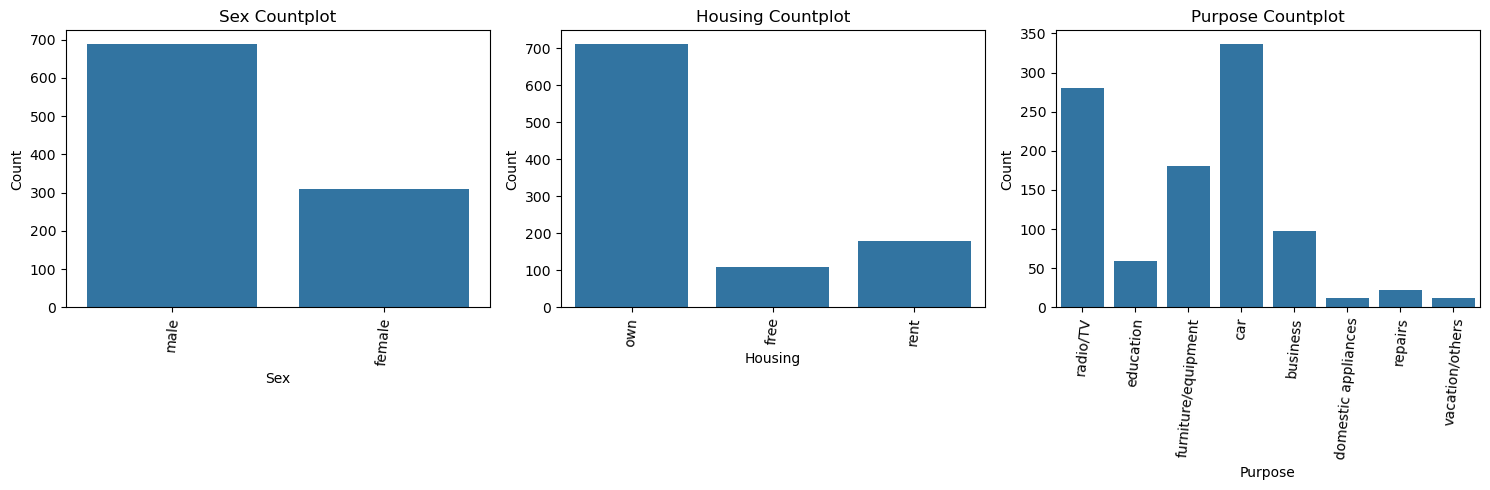

In [26]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(['Sex', 'Housing', 'Purpose']):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[column])  # palette parametresi kaldırıldı
    plt.title(f'{column} Countplot')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

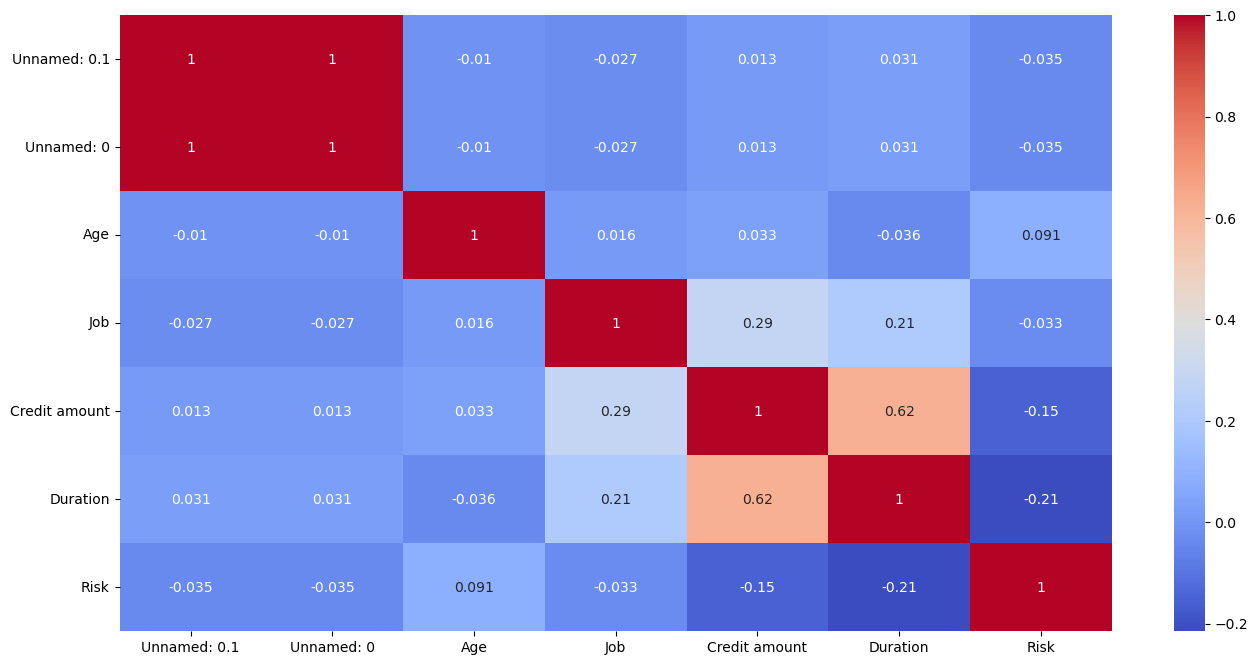

In [15]:
# Sayısal olmayan sütunları çıkarma
df_numeric = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesaplama
correlation_matrix = df_numeric.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [16]:
eksik_deger_sayisi = df.isnull().sum()
print(eksik_deger_sayisi)

Unnamed: 0.1          0
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [24]:
# Eksik değer bulunan kolonları görmek için
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Saving accounts     183
Checking account    394
dtype: int64


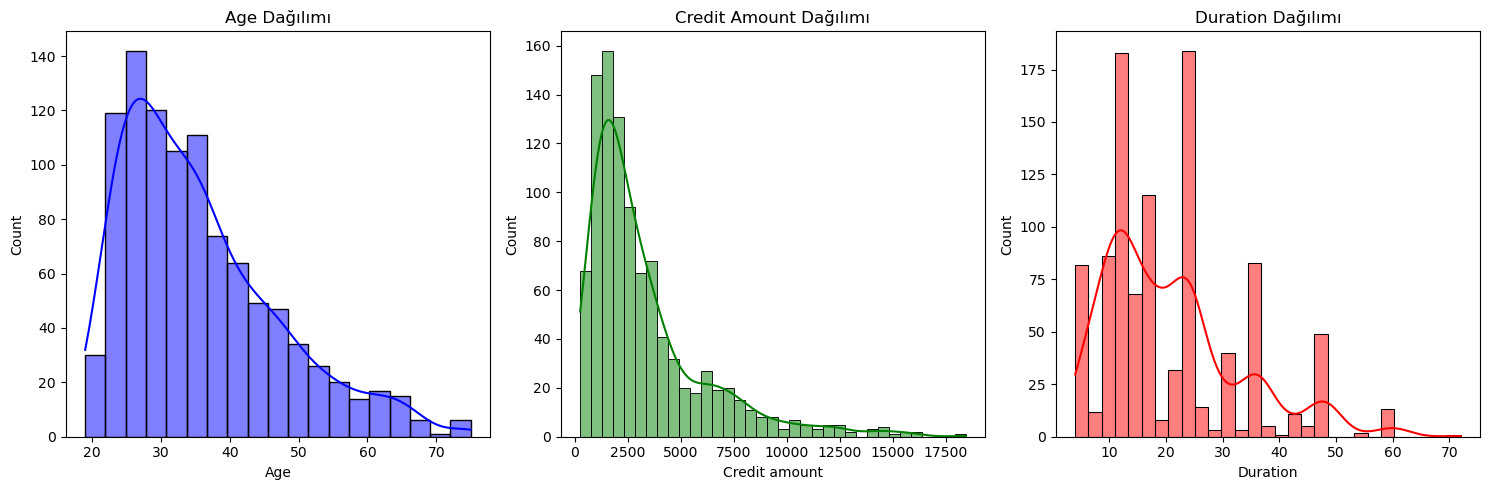

In [17]:
plt.figure(figsize=(15, 5))

# Age dağılımı
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Dağılımı')

# Credit amount dağılımı
plt.subplot(1, 3, 2)
sns.histplot(df['Credit amount'], kde=True, color='green')
plt.title('Credit Amount Dağılımı')

# Duration dağılımı
plt.subplot(1, 3, 3)
sns.histplot(df['Duration'], kde=True, color='red')
plt.title('Duration Dağılımı')

plt.tight_layout()
plt.show()

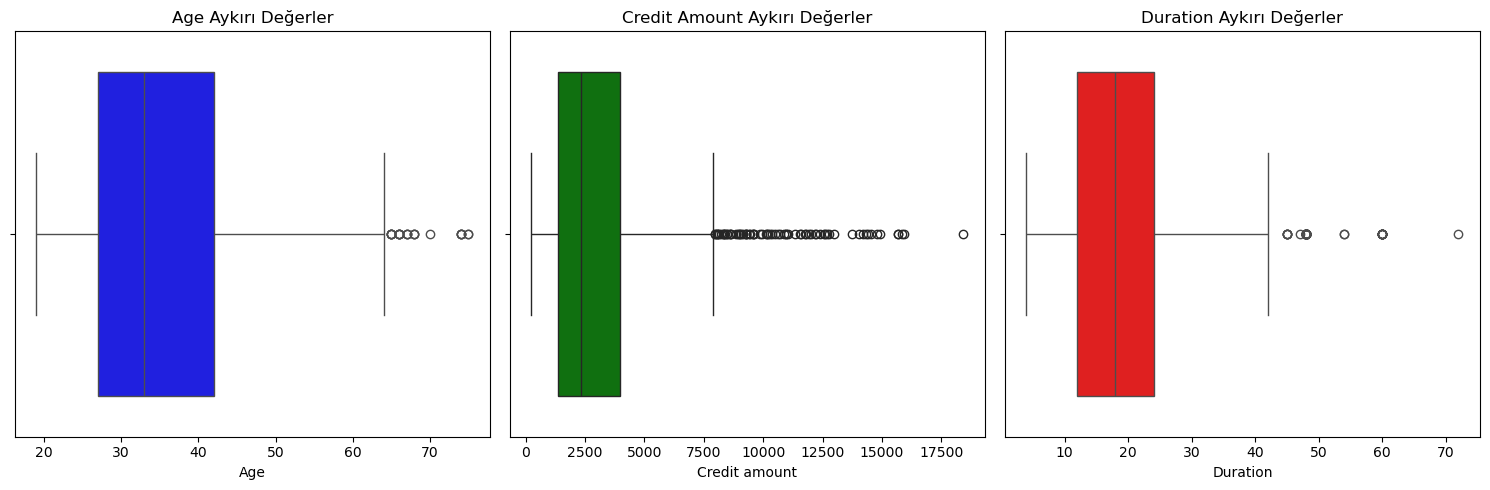

In [18]:
plt.figure(figsize=(15, 5))

# Age boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'], color='blue')
plt.title('Age Aykırı Değerler')

# Credit amount boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Credit amount'], color='green')
plt.title('Credit Amount Aykırı Değerler')

# Duration boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Duration'], color='red')
plt.title('Duration Aykırı Değerler')

plt.tight_layout()
plt.show()

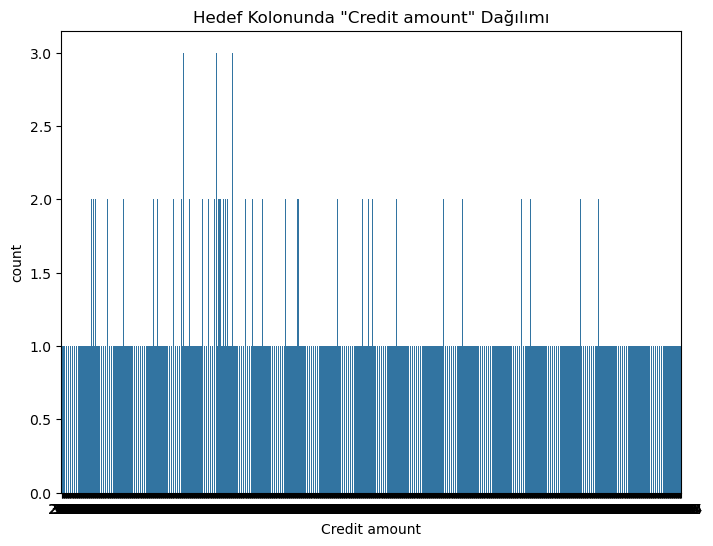

In [19]:
# Hedef kolonu dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit amount', data=df)  
plt.title('Hedef Kolonunda "Credit amount" Dağılımı')
plt.show()

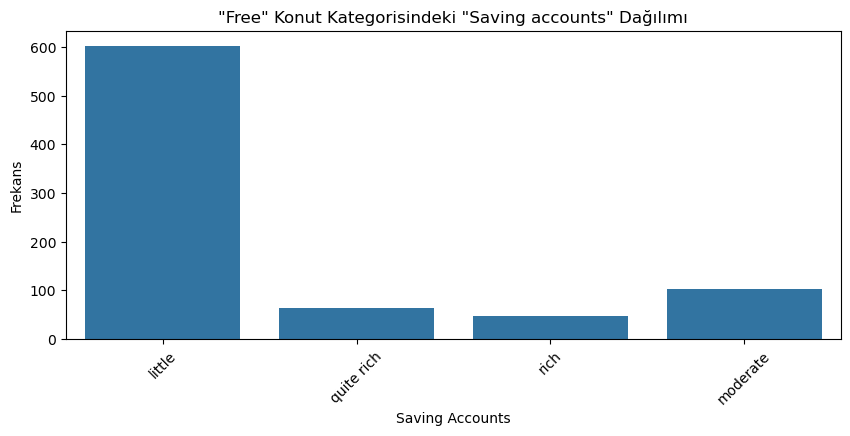

In [23]:
# "Saving accounts" değişkeninin dağılımını görselleştirme
plt.figure(figsize=(10, 4))
sns.countplot(x='Saving accounts', data=df)
plt.title('"Free" Konut Kategorisindeki "Saving accounts" Dağılımı')
plt.xlabel('Saving Accounts')
plt.ylabel('Frekans')
plt.xticks(rotation=45)  # X eksenindeki yazıları döndürme (gerekiyorsa)
plt.show()

In [38]:
# 75. percentile hesaplama
percentile_75 = df['Credit amount'].quantile(0.75)
print(f"75. percentile: {percentile_75}")

75. percentile: 3972.25


In [40]:
# Yüksek kredi miktarına sahip bireyleri seçme
high_credit_df = df[df['Credit amount'] > percentile_75]

In [41]:
# En sık kullanılan 3 Purpose kategorisi
top_3_purposes = high_credit_df['Purpose'].value_counts().head(3)
print(top_3_purposes)

Purpose
car         108
radio/TV     39
business     39
Name: count, dtype: int64


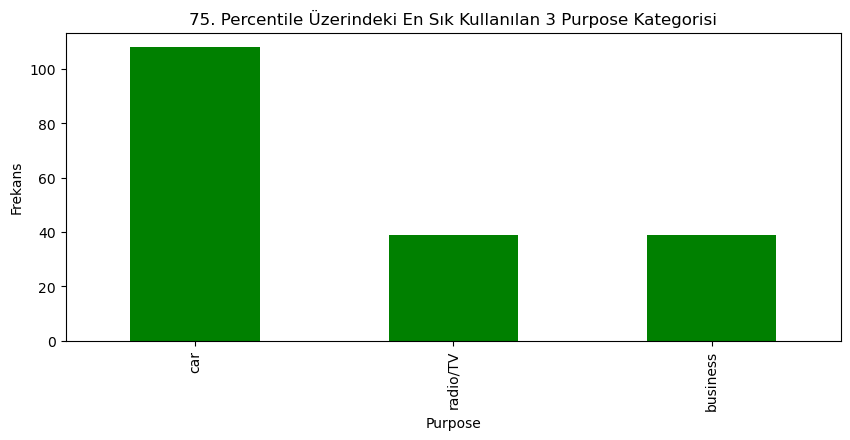

In [45]:
# En sık kullanılan 3 Purpose kategorisini görselleştirme
plt.figure(figsize=(10, 4))
top_3_purposes.plot(kind='bar', color='green')
plt.title('75. Percentile Üzerindeki En Sık Kullanılan 3 Purpose Kategorisi')
plt.xlabel('Purpose')
plt.ylabel('Frekans')
plt.show()

In [47]:
# Eksik değerleri "unknown" olarak doldurma
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')


In [48]:
# Sayısal değerlere dönüştürme için eşleştirme sözlüğü
account_mapping = {
    'unknown': 0,
    'little': 1,
    'moderate': 2,
    'rich': 3
}

# Mapping işlemini uygulama
df['Saving accounts'] = df['Saving accounts'].map(account_mapping)
df['Checking account'] = df['Checking account'].map(account_mapping)


In [49]:
# Dönüşüm sonrası kontrol
print(df[['Saving accounts', 'Checking account']].head())


   Saving accounts  Checking account
0              0.0                 1
1              1.0                 2
2              1.0                 0
3              1.0                 1
4              1.0                 1


In [50]:
# Sayısal değişkenleri seçme
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


In [51]:
# Eksik değerlerin kontrolü
print(df[numeric_columns].isnull().sum())


Unnamed: 0.1         0
Unnamed: 0           0
Age                  0
Job                  0
Saving accounts     63
Checking account     0
Credit amount        0
Duration             0
Risk                 0
dtype: int64


In [52]:
# Eksik değerlerin kontrolü
print(df[numeric_columns].isnull().sum())


Unnamed: 0.1         0
Unnamed: 0           0
Age                  0
Job                  0
Saving accounts     63
Checking account     0
Credit amount        0
Duration             0
Risk                 0
dtype: int64


In [53]:
# 'Purpose' ve 'Housing' kolonları için one-hot encoding
df = pd.get_dummies(df, columns=['Purpose', 'Housing'], drop_first=True)


In [61]:
# Sayısal kolonlardaki eksik değerleri kontrol etme
numeric_columns = ["Age", "Credit amount", "Duration"]
df_cleaned[numeric_columns].isnull().sum()


Age              0
Credit amount    0
Duration         0
dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler

# Sayısal kolonların seçimi
columns_to_scale = ["Age", "Credit amount", "Duration"]

# StandardScaler ile ölçekleme
scaler = StandardScaler()
df_cleaned[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

# Ölçeklenmiş verinin ilk birkaç satırını görüntüleme
df_cleaned[columns_to_scale].head()


,Age,Credit amount,Duration
0,2.766456,-0.745131,-1.236478
1,-1.191404,0.949817,2.248194
2,1.183312,-0.416562,-0.738668
3,0.831502,1.634247,1.750384
4,1.535122,0.566664,0.256953


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# 1. df (ön işlenmiş veri seti) kullanılarak hedef ve özellikleri ayırma
X = df.drop(columns=['Risk'])  # 'Risk' hedef değişkeni çıkarıyoruz
y = df['Risk']  # 'Risk' hedef değişkeni

# 2. Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)  # Kategorik verileri sayısallaştırıyoruz

# 3. Eğitim ve Test Kümesi Oluşturma (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Özelliklerin Ölçeklendirilmesi (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Lojistik Regresyon Modeli Eğitme
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 6. Model ile Tahmin Yapma
y_pred = model.predict(X_test_scaled)

# 7. Model Performansını Değerlendirme

# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Kesinlik (Precision)
precision = precision_score(y_test, y_pred)

# Duyarlılık (Recall)
recall = recall_score(y_test, y_pred)

# F1-Skoru
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırma
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1-Skoru: {f1:.4f}")

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
print(f"Karışıklık Matrisi:\n{cm}")


Doğruluk (Accuracy): 0.7050
Kesinlik (Precision): 0.7384
Duyarlılık (Recall): 0.9007
F1-Skoru: 0.8115
Karışıklık Matrisi:
[[ 14  45]
 [ 14 127]]


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. df (ön işlenmiş veri seti) kullanılarak hedef ve özellikleri ayırma
X = df.drop(columns=['Risk'])  # 'Risk' hedef değişkeni çıkarıyoruz
y = df['Risk']  # 'Risk' hedef değişkeni

# 2. Kategorik verileri sayısal verilere dönüştürme (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)  # Kategorik verileri sayısallaştırıyoruz

# 3. Eğitim ve Test Kümesi Oluşturma (train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Özelliklerin Ölçeklendirilmesi (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Hiperparametre Optimizasyonu (GridSearchCV) ile En İyi "k" Değerini Bulma
param_grid = {'n_neighbors': range(1, 21)}  # k değeri 1 ile 20 arasında denenecek
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# En iyi "k" değerini yazdırma
best_k = grid_search.best_params_['n_neighbors']
print(f"En iyi 'k' değeri: {best_k}")

# 6. En iyi "k" ile Modeli Eğitme
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# 7. Model ile Tahmin Yapma
y_pred = best_knn.predict(X_test_scaled)

# 8. Model Performansını Değerlendirme

# Doğruluk (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Kesinlik (Precision)
precision = precision_score(y_test, y_pred)

# Duyarlılık (Recall)
recall = recall_score(y_test, y_pred)

# F1-Skoru
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırma
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1-Skoru: {f1:.4f}")

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
print(f"Karışıklık Matrisi:\n{cm}")


En iyi 'k' değeri: 19
Doğruluk (Accuracy): 0.6700
Kesinlik (Precision): 0.7005
Duyarlılık (Recall): 0.9291
F1-Skoru: 0.7988
Karışıklık Matrisi:
[[  3  56]
 [ 10 131]]


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Lojistik Regresyon Modeli Eğitme
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# 2. Tahmin Yapma
y_pred_logreg = logreg.predict(X_test_scaled)

# 3. Karışıklık Matrisi
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(f"Lojistik Regresyon Karışıklık Matrisi:\n{cm_logreg}")

# 4. Sınıflandırma Raporu
report_logreg = classification_report(y_test, y_pred_logreg)
print(f"Lojistik Regresyon Sınıflandırma Raporu:\n{report_logreg}")


Lojistik Regresyon Karışıklık Matrisi:
[[ 14  45]
 [ 14 127]]
Lojistik Regresyon Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.50      0.24      0.32        59
           1       0.74      0.90      0.81       141

    accuracy                           0.70       200
   macro avg       0.62      0.57      0.57       200
weighted avg       0.67      0.70      0.67       200



In [77]:
from sklearn.neighbors import KNeighborsClassifier

# 1. KNN Modeli Eğitme (En iyi k ile)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# 2. Tahmin Yapma
y_pred_knn = knn.predict(X_test_scaled)

# 3. Karışıklık Matrisi
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f"KNN Karışıklık Matrisi:\n{cm_knn}")

# 4. Sınıflandırma Raporu
report_knn = classification_report(y_test, y_pred_knn)
print(f"KNN Sınıflandırma Raporu:\n{report_knn}")


KNN Karışıklık Matrisi:
[[  3  56]
 [ 10 131]]
KNN Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.23      0.05      0.08        59
           1       0.70      0.93      0.80       141

    accuracy                           0.67       200
   macro avg       0.47      0.49      0.44       200
weighted avg       0.56      0.67      0.59       200

